In [1]:
import graphviz
graphviz.__version__, graphviz.version()


('0.20.1', (2, 50, 0))

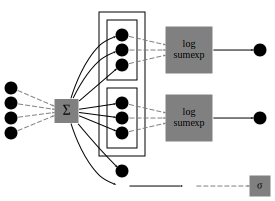

In [19]:
gra = graphviz.Digraph(format="svg", engine="dot")
layers = [6,1, 7,1]
layers_str = ["Input"] + ["Hidden"] * (len(layers) - 2) + ["Output"]
layers_col = ["none"] + ["none"] * (len(layers) - 2) + ["none"]
layers_fill = ["black"] + ["gray"] * (len(layers) - 2) + ["black"]
penwidth = "1"

font = "Hilda 10"

#gra.graph_attr["fontname"]=font
gra.graph_attr["splines"]="spline"
gra.graph_attr["rankdir"]="LR"
gra.graph_attr["nodesep"]=".00008"
gra.graph_attr["ranksep"]="0.5"

gra.edge_attr["color"]="black"
gra.edge_attr["arrowsize"] = ".1"

gra.node_attr["fixedsize"]="true"
gra.node_attr["label"]=""
#gra.node_attr["style"]="true"
gra.node_attr["fixedsize"]="filled"
gra.node_attr["color"]="white"
gra.node_attr["shape"]="circle"
gra.node_attr["fillcolor"]="gray"
gra.node_attr["width"]="0.2"


N=6
node_in = 4

#NODE IN
with gra.subgraph(name="input") as gg:
        gg.node_attr["penwidth"] = penwidth
        gg.node_attr["fillcolor"] = "black"
        gg.node_attr["color"] = "white"
        gg.node_attr["shape"] = "circle"
        gg.node_attr["style"] = "filled"
        for i in range(node_in):
            gg.node(f"l{i + 1}in", label=None)
#with gra.subgraph(name="sum") as gg:

#NODE SUM
gra.node("l1sum", color="white", fillcolor="gray", penwidth=penwidth, shape="square", style="filled", label="Σ")

for i in range(node_in):
    gra.edge(f"l{i + 1}in", "l1sum", color="grey", style="dashed")

N_i = N-node_in + 1 

with gra.subgraph(name="cluster second") as gg:
    gg.node_attr["shape"] = "circle"
    gg.node_attr["style"] = "filled"
    gg.node_attr["color"] = "white"
    gg.node_attr["penwidth"] = penwidth
    gg.node_attr["fillcolor"] = "black"

    with gg.subgraph(name="cluster 1") as ggg:
        for i in range(N_i):
            ggg.node(f"l{i + 1}plus")
    
    with gg.subgraph(name="cluster 2") as ggg:
        for i in range(N_i):
            ggg.node(f"l{i + 1}minus")

with gra.subgraph(name="third") as gg:
    gg.node_attr["style"] = "filled"
    gg.node_attr["color"] = "white"
    #gg.node_attr["penwidth"] = penwidth
    gg.node_attr["fillcolor"] = "gray"
    gg.node_attr["width"] = "0.3"


    #with gg.subgraph(name="cluster 1") as ggg:
        #for i in range(N_i):
    gg.node(f"l1plus_1", label="log\nsumexp", shape="square", fontsize="10",  penwidth=penwidth, width="0.1")
    
    #with gg.subgraph(name="cluster 2") as ggg:
    gg.node(f"l1minus_1", label="log\nsumexp", shape="square", fontsize="10")

gra.node("end0", color="white", fillcolor="black", penwidth=penwidth, shape="circle", style="filled")
gra.node("end1", color="white", fillcolor="black", penwidth=penwidth, shape="circle", style="filled")
gra.node("end2", color="white", fillcolor="black", penwidth=penwidth, shape="circle", style="filled")


gra.edge("l1sum", "0")

with gg.subgraph(name="cluster 0") as ggg:
    ggg.node("0")

for i in range(N_i):
    gra.edge("l1sum", f"l{i + 1}plus")
    gra.edge("l1sum", f"l{i + 1}minus")

for i in range(N_i):
    gra.edge(f"l{i + 1}plus", f"l1plus_1", color="grey", style="dashed")
    gra.edge(f"l{i + 1}minus", f"l1minus_1", color="grey", style="dashed")

gra.node("sigma", label="σ",  shape="square", fontsize="10", penwidth=penwidth, style="filled", color="white", fillcolor="gray")

gra.edge(f"l1plus_1", "end1")
gra.edge(f"l1minus_1", "end2")
gra.edge(f"l1sum", "end0")

gra.edge("0", "end", arrowtail="curve", arrowhead="curve")
gra.edge("end", "sigma", color="grey", style="dashed")

gra

In [ ]:
gra.edge("l1in", "l1sum")
for i in range(0, len(layers)):
    print(i)
    with gra.subgraph(name=layers_str[i]) as gg:
        gg.node_attr["shape"] = "circle"
        gg.node_attr["style"] = "filled"
        gg.node_attr["color"] = "white"
        gg.node_attr["penwidth"] = penwidth
        gg.node_attr["fillcolor"] = layers_fill[i]

        for a in range(layers[i]):
            gg.node(f"l{i + 1}{a}", label=None)
        #gg.graph_attr["label"] = layers_str[i]

with gra.subgraph(name="last") as gg:
    gg.node_attr["shape"] = "circle"
    gg.node_attr["style"] = "filled"
    gg.node_attr["color"] = "white"

    with gg.subgraph(name="cluster last0") as ggg:
        ggg.node("A", label="A")
    with gg.subgraph(name="cluster last1") as ggg:
        ggg.node("B0", label="B0")
        ggg.node("B1", label="B1")
        ggg.node("B2", label="B2")
    with gg.subgraph(name="cluster last2") as ggg:
        ggg.node("C", label="C")

gra.edge("l40", "B0")
gra.edge("l40", "B1")
gra.edge("l40", "B2")
gra.edge("l40", "A")
gra.edge("l40", "C")

for i in range(1, len(layers)):
    for a in range(layers[i - 1]):
        for b in range(layers[i]):
            gra.edge(f"l{i}{a}", f"l{i + 1}{b}")

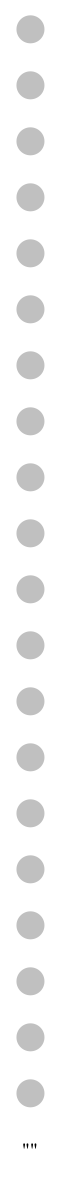

In [108]:
gra